# Recherche dichotomique

Nous disposons d'un tableau d'entier $A[1..n]$ **trié dans l'ordre croissant** et d'un objet $x$ que nous recherchons dans ce tableau.

## Stratégie

[Vidéo d'accompagnement 1 ... à voir après une première lecture](https://vimeo.com/426404176)

L'idée de la *recherche dichotomique* - qui emploie une stratégie «diviser-pour-régner» dont nous reparlerons - est la suivante:

1. Comparer l'objet du «milieu» avec celui qu'on cherche $x$,
2. **si** ils sont *égaux*, **terminer** en renvoyant ce «milieu».
3. **si** $x$ est *plus petit*, chercher dans le sous-tableau gauche $A[1..{\tiny (\text{milieu})}[$,
4. **sinon**, chercher dans le sous-tableau droit $A]{\tiny (\text{milieu})}..n]$.

*Note*: un crochet tourné vers «l'extérieur» indique que l'index est exclus.

Voici une illustration de cette stratégie:

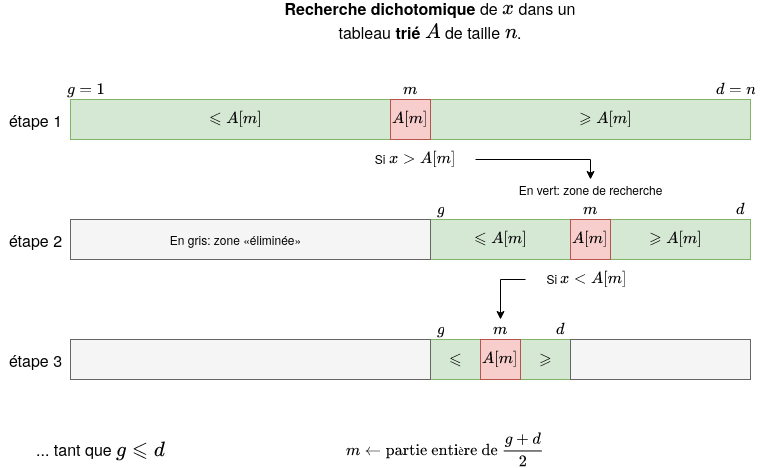

On utilise en pratique trois index $g$, $d$ et $m$ (pour gauche, droite, milieu) de façon à délimiter la «zone» de recherche $A[g..d]$ et à la partager en trois sous zones $A[g..m-1]$, $A[m]$ et $A[m+1..d]$.

À chaque itération, si l'élément cherché n'est pas $A[m]$, on actualise la zone de recherche selon que $x$ se «situe» à sa gauche ou à sa droite.

$m$ est recalculé après que $g$ et $d$ aient été actualisés, en prenant la partie entière de leur moyenne.

## «pseudo code» de l'algorithme

On aboutit alors à l'algorithme de recherche dichotomique où $A$ est un tableau déjà trié et $x$ l'élément qu'on recherche:

*Données*: Un tableau $A$ trié dans l'ordre croissant et un objet $x$.

*Problème*: Trouver si $x$ est dans $A$ et, dans ce cas, renvoyer son index. 

<pre><strong>Recherche-Dichotomique</strong>(A,x):
1    g ← 1; d ← longueur(A)
2    <strong>Tant que</strong> g ≤ d:
3        m ← partie entière de (g+d)/2
4        <strong>Si</strong> x ≟ A[m]: <strong>renvoyer</strong> m
5        <strong>Si</strong> x < A[m]: d ← m - 1
6        <strong>Sinon</strong>      : g ← m + 1
7    <strong>renvoyer</strong> -1
</pre> 

*Exemples de fonctionnement*

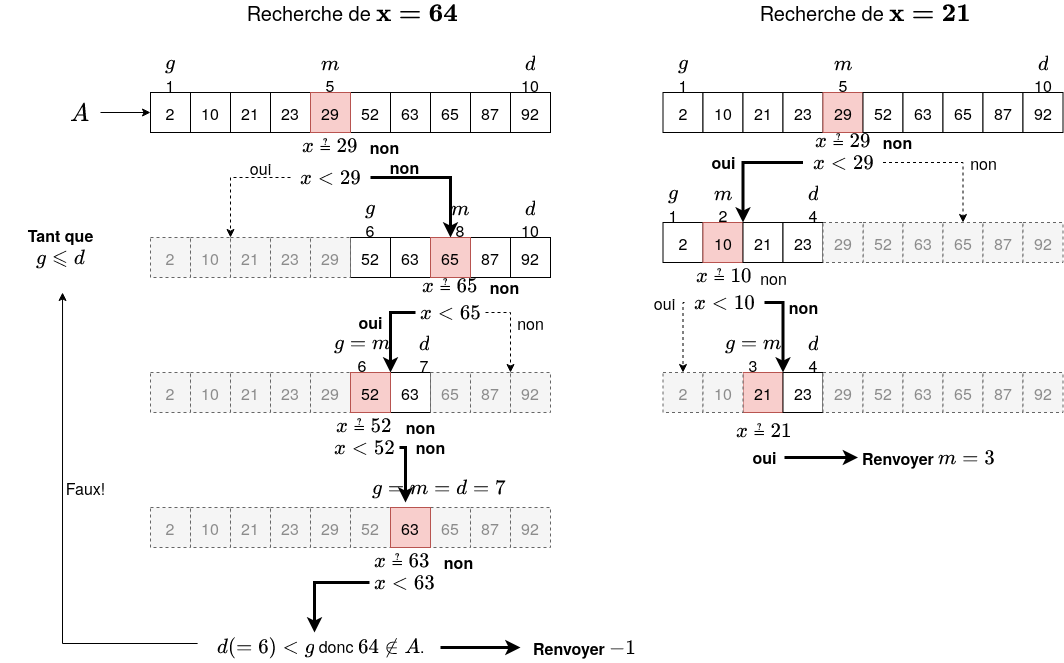

#### Exercice 1

Implémenter l'algorithme de recherche dichotomique en Python puis le tester sur les deux exemples donnés plus haut.
___

In [ ]:
def recherche_dichotomique(A, x):
    # A est supposé trié dans l'ordre croissant
    g = 0; d = len(A)-1
    while g <= d:
        m = (g + d)//2
        if x == A[m]: return m
        if x < A[m]:
            d = m - 1
        else:
            g = m + 1
    return -1

test = [2, 10, 21, 23, 29, 52, 53, 65, 87, 92]
assert recherche_dichotomique(test, 64) == -1
assert recherche_dichotomique(test, 21) == 2

#### Exercice 2

On suppose que la condition de boucle a été remplacée par $g<d$ (plutôt que $g\leqslant d$).

Trouver un exemple où l'algorithme échoue en cherchant une valeur qui se trouve pourtant dans le tableau.
___

Il suffit de reprendre l'exemple donné et de chercher 23 (plutôt que 21).

La figure vous montre qu'en fin de boucle, l'affectation sera $g\leftarrow m+1$ qui aboutie à $g=d$. Donc la boucle termine (car $g<d$ est faux) et l'algo renvoie $-1$.

## Analyse de la recherche dichotomique

[Vidéo d'accompagnement 2 ... à voir après une première lecture](https://vimeo.com/426404176)

Encore une fois, les algorithmes s'appuient les uns sur les autres. Il est donc indispensable de passer du temps à vérifier:
- leur **cohérence**: par exemple, est-on assuré que l'écriture $A[m]$ ne va pas échouer parce qu'à un moment $m$ pourrait sortir de la plage $1..n$?
- la **terminaison** des boucles <code><strong>Tant que</strong></code>: est-on assuré qu'à un moment la condition de la boucle **tant que** deviendra fausse c'est-à-dire qu'on aura $g>d$?
- leur **correction**: est-on assuré qu'on obtient le résultat visé quel que soit le tableau en entrée et la valeur recherchée.
- leur **efficacité**: Quel rapport y a-t-il entre la taille de l'entrée (ici symbolisé par $n$) et le temps d'exécution ?

*Conseil*: Pour bien suivre l'analyse qui suit, régler l'environnement du lab de façon à toujours avoir bien en vue l'algorithme `Recherche-Dichotomique`.

### **Cohérence**: A[m] est-il correct?

*si* $g\leqslant d$ (condition de boucle) alors $\overbrace{g+g}^{2g}\leqslant g+d\leqslant \overbrace{d+d}^{2d}$ donc, en divisant par $2$ chaque membre $$g\leqslant \dfrac{g+d}{2}\leqslant d$$
Il suffit alors d'observer que $g$ et $d$ sont des entiers, donc $m$, la partie entière de la moyenne, est encore entre ces deux nombres $$g\leqslant d \implies g\leqslant m\leqslant d\qquad(*)$$

Mais «le diable se niche dans les détails»:
> Pour que $A[m]$ soit correct, il faudrait s'assurer que $g$ et $d$ sont dans la plage $1..n$ avant le calcul de $m$.

En fait, cela découle de l'observation qu'*à la fin de la boucle et avant l'itération suivante*:
> soit $g$ augmente strictement soit $d$ diminue strictement (du fait de l'inégalité $(*)$ - voir ligne 5 et 6).

Mais comme *initialement* $g=1$ et $d=n$, cela entraîne (dominos...) que $g$ est toujours plus grand que 1 et $d$ toujours plus petit que $n$, de sorte que si on entre à nouveau dans la boucle ($g\leqslant d$ est vrai), on est assuré que $g$ et $d$ sont compris entre $1$ et $n$ et donc $m$ aussi! cqfd.

### **Terminaison** de la boucle *Tant que*

Cela découle du fait que, si le programme ne termine pas prématurément (ligne 4), alors on est assuré que, *soit* $g$ augmente *strictement*, *soit* $d$ diminue *strictement* comme expliqué plus tôt. Le premier finira donc par excéder le second ($d<g$) ce qui terminera la boucle.

### **Correction** 

Nous devons expliquer *pourquoi* l'algorithme fait bien ce qu'il est sensé faire.

**Si $x$ n'est pas dans le tableau**, la boucle ne peut pas se terminer sur la ligne 4. Donc, elle se termine avec $d<g$ et dans ce cas on renvoie $-1$ comme voulu.

**Si $x$ est un élément du tableau**, il s'écrit $x=A[i]$ avec $1\leqslant i\leqslant n$. Comment s'assurer qu'à un moment, on aura $m=i$ ce qui nous garantirait sa bonne exécution? C'est nettement plus délicat... et vous pouvez l'admettre si vous voulez. 

Pour celles et ceux qui veulent aller au bout du raisonnement...

[Vidéo d'accompagnement 4 ... à voir après une première lecture](https://vimeo.com/426406551)

Nous allons procéder en deux étapes:
1. Premièrement, montrons qu'**on a toujours $g\leqslant i \leqslant d$** dans ce cas.

  C'est vrai à l'étape d'initialisation car $g=1$ et $d=n$.

  Montrons que *si c'est vrai* avant une itération arbitraire de la boucle **tant que**, alors soit $m=i$ pour cette boucle, soit c'est encore vrai avant l'itération suivante.

  Notre hypothèse est $g\leqslant i\leqslant d$. Après calcul de $m$, on est nécessairement dans l'une des situations suivantes:
$$m=i\qquad m<i \qquad m>i$$
  Dans le premier cas, c'est terminé! Dans le second $A[m]<\overbrace{A[i]}^{x}$ car $A$ est trié dans l'ordre croissant donc la ligne 6 s'exécute et comme $m<i\implies \overbrace{m+1}^{g}\leqslant i$, on a toujours $g\leqslant i \leqslant d$ vu que $d$ n'est pas modifié. 
  
  On prouve le troisième cas de manière similaire.

  *Malheureusement, cela ne prouve toujours pas qu'on aura effectivement $i=m$!* 

2. On va montrer l'affirmation suivante:

   > *si on a toujours $i\neq m$* alors, au *début de la dernière itération* de la boucle **tant que**, on a nécessairement $g=d$.

  Avant de prouver cette affirmation, montrons comment elle prouve à son tour que l'algorithme est correct.
  
  En effet, on a déjà prouvé que $g\leqslant i,m\leqslant d$. Si $i$ est toujours différent de $m$, l'affirmation nous permet de conclure que $g=d$ (au début du dernier tour) et donc $i=m$. C'est une contradiction:$$ i\neq m \text{ à chaque tour } \implies i=m \text{ au dernier tour}$$
  
  Cette contradiction montre que l'hypothèse - on a toujours $i\neq m$ - est nécessairement fausse. Cela signifie précisément qu'on a *au moins une fois* $i=m$ si $x\in A$ et donc que l'algorithme est correct.

  **preuve de l'affirmation**: Si on est dans la dernière itération et que $i\neq m$, alors en fin de boucle, la condition de boucle doit devenir fausse ($g>d$); mais alors, à la dernière étape, *de deux choses l'une*:
$$\underbrace{m+1}_{g}>d\qquad \text{OU BIEN} \qquad \underbrace{m-1}_{d}<g$$

  Examinons le premier cas. On a déjà prouvé que $m\leqslant d$ dans la boucle donc on a nécessairement $m=d$ dans ce cas. mais alors:
$$d=m=\text{partie entière de }\dfrac{g+d}{2}\leqslant \dfrac{g+d}{2}$$ 
  En résumé:
$$d\leqslant \dfrac{g+d}{2} \stackrel{\times 2}{\implies} 2d\leqslant g+d \stackrel{-d}{\implies} d\leqslant g$$

  Mais nous sommes dans la boucle à ce stade et donc $g\leqslant d$ (condition de boucle!) ce qui n'est possible que si $g=d$.

  En examinant similairement de second cas, on obtient encore que $g=d$.

## Analyse de son **efficacité**

[Vidéo d'accompagnement 3 ... à voir après une première lecture](https://vimeo.com/426405453)

Quel est l'ordre de grandeur du temps d'exécution de cet algorithme en fonction de la taille de l'entrée c'est-à-dire du tableau?

On se place dans le **cas le plus défavorable** ($x\not\in A$). La boucle ne sera pas interrompue prématurément et on finira par avoir $g>d$. Il est naturel de se demander combien de fois le corps de boucle s'exécutera?

L'**observation cruciale** est, qu'à chaque itération:
> la taille du tableau (dans lequel on recherche $x$) est approximativement divisée par $2$.

Par exemple, si la taille de notre tableau est $1024=2^{10}$, alors la taille du sous-tableau est approximativement:
- après la **1ère** itération: $1024\div 2={\bf 512}=2^9$ (au plus) $\qquad \rightarrow 2^{10}/2^{\color{red}{1}}$,
- après la **seconde**: $512\div 2={\bf 256}=2^8$ (au plus) $\qquad \rightarrow 2^{10}/2^{\color{red}{2}}$,
- ...
- après la **neuvième** itération: $4\div 2={\bf 2}=2^1 \qquad \rightarrow 2^{10}/2^{\color{red}{9}}$,
- après la **dixième** itération: $2\div 2={\bf 1}=2^{0}\qquad\rightarrow 2^{10}/2^{\color{red}{10}}$.

Cela montre qu'il faudra au plus $11$ itérations (voisin de $10$) pour trouver un élément dans un tableau contenant $1024=2^{10}$ éléments.

*Et si ce n'est pas une puissance de $2$?* Par exemple, si il y a $1500$ éléments, observer que: 
$$2^{10}< 1500 <2^{11}\stackrel{\div 2^{10}}{\implies}1 < 1500/2^{10} < 2 \quad\tiny \text{car }2^{11}/2^{10}=2^{11-10}=2^1=2!$$

Donc à la 11e itération, le sous-tableau est de taille $<1$ et la boucle s'arrête!

**Conclusion**: on peut résumer ces observations en affirmant que 
> si la taille $n$ du tableau est voisine de $2^{\color{red}{m}}$ c'est-à-dire si $n\approx 2^{\color{red}{m}}$ <br/> alors le temps d'exécution de l'algorithme est approximativement proportionnel à $\color{red}{m}$.

Évidemment, plus $n$ est grand, plus $m$ (entier tel que $2^m\approx n$) le sera. MAIS, $m$ croît beaucoup, beaucoup *moins vite* que $n$. 

L'entier $m$ tel que $n\approx 2^m$ est appelé **logarithme en base 2 de** $n$ et on note $m=\log  n$.

> Pour cette raison, on dit que l'efficacité de la recherche dichotomique est $O(\log n)$.

#### Exercice 3

Écrire une fonction `nb_de_tours(n)` qui renvoie le plus petit entier $k$ tel que $2^k>n$, c'est-à-dire le nombre maximal de valeurs examinées par la recherche dichotomique dans un tableau de taille $n$.
____

In [ ]:
def nb_de_tours(n):
    courant = 1
    k = 0
    while courant <= n:
        courant = courant * 2
        k += 1
    return k

print(nb_de_tours(1024))

### Quelques points de repère sur le logarithme en base 2

Un entier $n$ étant donné, l'**exposant** de la puissance de $2$ *la plus proche de* $n$ est appelé **logarithme en base 2** de $n$.

En informatique, on convient de noter ce nombre important $\log n$ (parfois $\log_2 n$).

**Récapitulons**, étant donné un entier $n$: $$\text{si}\quad n\approx 2^{m}\quad \text{alors}\quad m\approx \log n\\\text{En bref:}\quad \boxed{n\approx 2^{\log n}}\qquad\small\text{il y a égalité si }n \text{ est une puissance de }2$$

*Exemples*: 
- $\log 2=\bf 1$ car $2={\bf 2^1}$,
- $\log (1K) \approx \bf 10$ car $1K= 1000\approx 1024={\bf 2^{10}}$.
- $\log(1M)\approx \bf 20$ car $$1M= 1\text{million}=10^6=(\text{mille})^2\approx (2^{10})^2=\bf 2^{20}$$

#### Exercice 4

Trouver combien vaut (environ) $\log(1G)$ (Giga).

1G = 1 milliard = $10^9=(10^3)^3\approx (2^{10})^3=2^{30}$ donc $\log(1G)\approx 30$

Cela doit vous permettre de sentir que l'algorithme de recherche dichotomique - en $O(\log n)$ - est *beaucoup*, *beaucoup* plus rapide que l'algorithme de recherche par parcourt linéaire - en $O(n)$! 

Mais tout de même moins rapide qu'un algorithme en $O(1)$ (temps constant)

Du plus rapide au moins rapide ($n$ la taille de l'entrée de l'algorithme):
> $O(1) < O(\log n) < O(n)$

### Encore un exemple pour bien mesurer la différence entre $O(n)$ et $O(\log n)$

Imaginer que vous disposiez de deux ordinateurs $A$ et $B$ et que $A$ soit *mille fois plus rapide* que $B$. Vous cherchez à résoudre un même problème et l'ordinateur $A$ est muni d'un algo en $O(n)$ tandis que $B$ est muni d'un algo en $O(\log n)$. Bien sûr, les deux algorithmes réalisent la même tâche.

Imaginer encore que, pour une entrée de taille 1000, $A$ met **1ms** et $B$ met **1s** pour traiter le problème.

À présent, l'entrée est de taille 100M (millions). 

- *Combien de temps mettra A*?

  Comme son algo est $O(n)$, la réponse est, tout simplement, qu'il mettra $100\,000$ fois plus de temps car $100M=100\,000\times 1000$ donc il mettra (environ!) **100s**.

- *Combien de temps mettra B?* 

  Nous savons que $\log 1000\approx 10$ et $\log(100M)=\log 10^8< \log 10^9\approx \log 2^{30}=30$  donc, par proportionnalité, il ne peut mettre plus de 3 fois plus de temps que pour une entrée de taille 1000 soit **3s**.

**Conclusion**: bien que mille fois moins rapide, l'ordinateur B résout le problème 33 fois plus vite que l'ordinateur A.

#### Exercice 5 - «devine le nombre»

L'ordinateur choisi un nombre au hasard (entre 1 et 100) et demande à l'utilisateur de le deviner. À chaque essai, l'ordinateur répond en affichant «c'est plus...» ou «c'est moins...» ou «gagné».

1. Programmer ce jeu.

   *Rappel*: `from random import randint` pour choisir le nombre au hasard. `reponse = int(input(<message>))` pour récupérer la valeur saisie par l'utilisateur. 

2. Améliore le en limitant le nombre de tentative: s'il est dépassé, le programme affiche «perdu, c'était ...».
____

**sol1**

In [ ]:
from random import randint

nb = randint(1,100)
print("Devine mon nombre (entre 1 et 100)")
essai = int(input("? "))
while nb != essai:
    if nb < essai: 
        print("c'est moins...")
    else:
        print("c'est plus...")
    essai = int(input("? "))
print("gagné!")

**sol2**

In [ ]:
from random import randint

nb = randint(1,100)
print("Devine mon nombre (entre 1 et 100)")
essai = int(input("? "))
nb_essai = 7
while nb_essai > 0 and nb != essai:
    nb_essai -= 1
    if nb < essai: 
        print("c'est moins...")
    else:
        print("c'est plus...")
    essai = int(input("? "))
if nb == essai:
    print("gagné!")
else:
    print(f"perdu: c'était {nb}!")